# Project Title: Analyzing E-commerce Product Reviews and Pricing Strategies


# E-commerce Product Analysis Using Amazon API

## Project Overview
This project analyzes e-commerce products using real-time data from Amazon. We will:
1. Retrieve product details using the Amazon API.
2. Explore and clean the data to make it ready for analysis.
3. Answer questions, such as:
   - How do product prices correlate with ratings?
   - What are common trends in reviews?
   - Can we identify clusters of similar products based on their features?


## Data Acquisition and Description

### Data Acquisition from Amazon API
For this project, we will use the RapidAPI "Real-Time Amazon Data" API to programmatically fetch product details for specific ASINs. ASIN (Amazon Standard Identification Number) is a unique identifier for products listed on Amazon.

The following ASINs will be used to retrieve product details:

1. **B0BR3M8XHK**: Type C Hub
2. **B0D8BFNBS4**: Knife Sharpener
3. **B0017L4PH0**: Airhead Candy
4. **B07WXJFFSY**: Starburst Candy
5. **B0CP9YBWMG**: Stanley Quencher H2.0 Tumbler
6. **B083L8RNJR**: TOLOCO Massage Gun
7. **B0CRQXPZWY**: Car Vacuum Cleaner
8. **B07QR4Q42L**: AstroAI Tire Inflator
9. **B0CXQ87QYN**: NicBex Full Length Mirror
10. **B07QLQ3QP4**: Air Wick Plug-in Scented Oil Starter Kit

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Function to fetch product details for a given ASIN

In [2]:
def fetch_product_details(asin):
    url = "https://real-time-amazon-data.p.rapidapi.com/product-details"
    querystring = {"asin": asin, "country": "US"}
    headers = {
        "x-rapidapi-key": "26709b8970msh1add6daa509ce63p176731jsnd2ba384580e6",
        "x-rapidapi-host": "real-time-amazon-data.p.rapidapi.com"
    }
    response = requests.get(url, headers=headers, params=querystring)
    
    if response.status_code == 200:
        return response.json()  # Return the entire JSON response
    else:
        print(f"Error fetching details for ASIN {asin}: {response.status_code}")
        return {}

# List of ASINs to fetch data for


In [3]:
asins = [
    "B0BR3M8XHK",  # Type C Hub
    "B0D8BFNBS4",  # Knife Sharpener
    "B0017L4PH0",  # Airhead Candy
    "B07WXJFFSY",  # Starburst Candy
    "B0CP9YBWMG",  # Stanley Quencher H2.0 Tumbler
    "B083L8RNJR",  # TOLOCO Massage Gun
    "B0CRQXPZWY",  # Car Vacuum Cleaner
    "B07QR4Q42L",  # AstroAI Tire Inflator
    "B0CXQ87QYN",  # NicBex Full Length Mirror
    "B07QLQ3QP4"   # Air Wick Plug-in Scented Oil Starter Kit
]

In [4]:
# Fetch product details
product_details = [fetch_product_details(asin) for asin in asins]

# Extract relevant details into a DataFrame
product_data = []
for product in product_details:
    if product and product.get("data"):  # Ensure data exists in response
        data = product["data"]
        product_data.append({
            "Title": data.get("product_title", "N/A"),
            "Price": float(data.get("product_price", "0").replace("$", "").replace(",", "")) if data.get("product_price") else 0.0,
            "Rating": float(data.get("product_star_rating", "0").split()[0]) if data.get("product_star_rating") else 0.0,
            "Num_Reviews": int(data.get("product_num_ratings", 0)),
            "Category": data.get("category", {}).get("name", "N/A")
        })

# Convert to DataFrame
df = pd.DataFrame(product_data)

# Display the DataFrame
print("Fetched Product Data:")
print(df)

Fetched Product Data:
                                               Title  Price  Rating  \
0  UGREEN Revodok 105 USB C Hub 5 in 1 Multiport ...  11.99     4.6   
1  Knife Sharpener, Professional Electric Knife S...  39.98     4.3   
2  Airheads Candy Bars, Variety Bulk Box, Chewy F...   9.84     4.8   
3  STARBURST FaveREDS Fruit Chews Chewy Candy, Sh...   3.99     4.7   
4  Stanley Quencher H2.0 Tumbler with Handle & St...  35.00     4.6   
5  TOLOCO Massage Gun, Deep Tissue Back Massage f...  49.99     4.4   
6  Car Vacuum, Portable Car Vacuum Cleaner with 7...  21.99     4.3   
7  AstroAI Tire Inflator Portable Air Compressor ...  31.98     4.5   
8  NicBex Full Length Mirror with Stand, 56"x19" ...  38.99     4.4   
9  Air Wick Plug in Scented Oil Starter Kit, 2 Wa...  16.99     4.5   

   Num_Reviews                        Category  
0        12735                     Electronics  
1          106                  Home & Kitchen  
2        76338          Grocery & Gourmet Food  


In [5]:
# Save the DataFrame to a CSV file
df.to_csv("amazon_products.csv", index=False)
print("Data saved to amazon_products.csv")

Data saved to amazon_products.csv


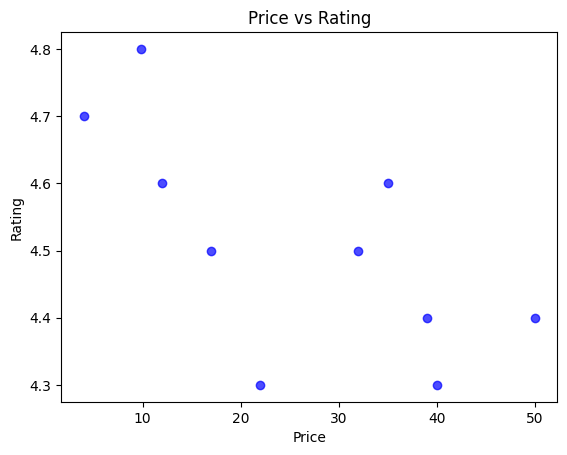

In [6]:
plt.scatter(df['Price'], df['Rating'], alpha=0.7, c='blue')
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

## Observations from the Scatter Plot
### General Trend:

 - Ratings are high across all price ranges, suggesting that price does not significantly impact ratings.
 - Most products are clustered around the rating range of 4.3–4.8.
### Potential Analysis:

 - To perform inferential statistics (e.g., a t-test) to confirm whether the differences in ratings for high- and low-priced products are statistically significant.


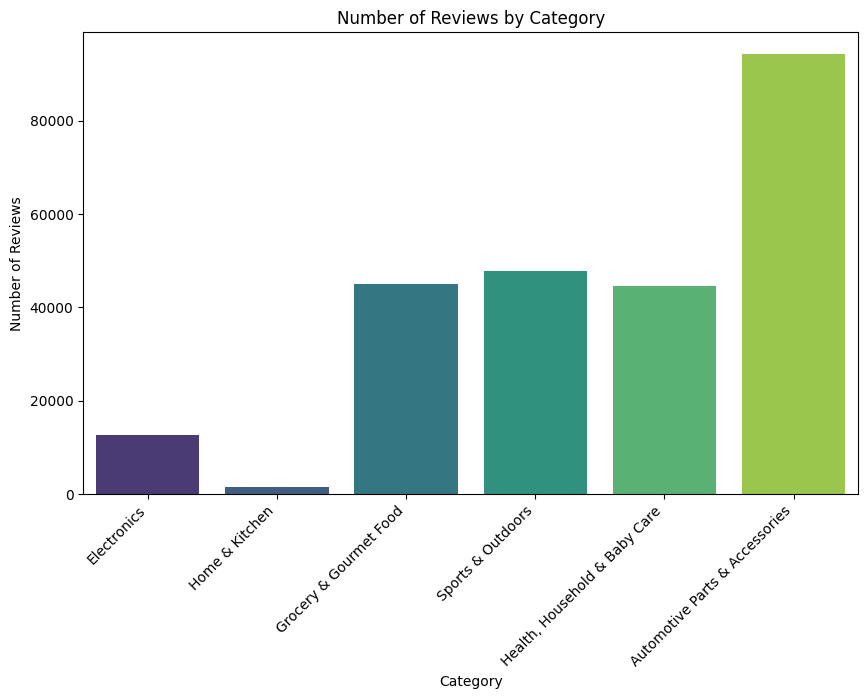

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Category',
    y='Num_Reviews',
    errorbar=None,
    hue='Category',  
    dodge=False,    
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title("Number of Reviews by Category")
plt.ylabel("Number of Reviews")
plt.xlabel("Category")
plt.legend([], [], frameon=False)  
plt.show()

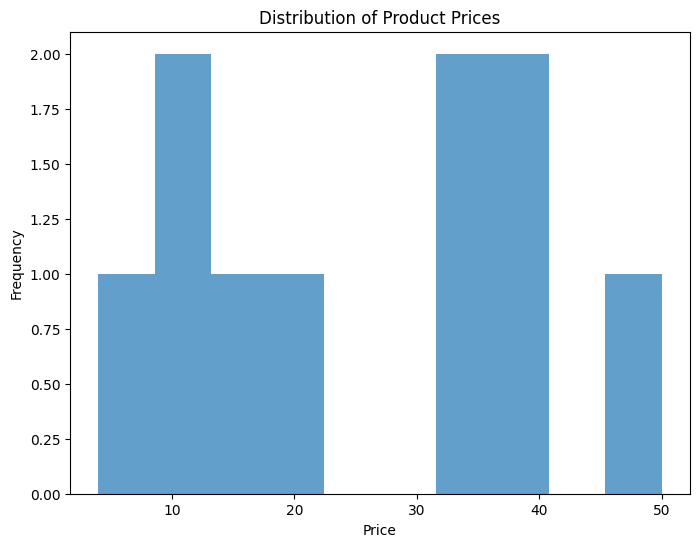

In [8]:
# Histogram of Prices
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=10, alpha=0.7)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## Data Normalization
Normalize the **Price** and **Num_Reviews** columns to bring them into a comparable range. This is particularly useful for clustering and regression tasks.

In [9]:
# Normalize Price and Num_Reviews
scaler = MinMaxScaler()
df[['Price', 'Num_Reviews']] = scaler.fit_transform(df[['Price', 'Num_Reviews']])

print("Normalized Data:")
print(df.head())

Normalized Data:
                                               Title     Price  Rating  \
0  UGREEN Revodok 105 USB C Hub 5 in 1 Multiport ...  0.173913     4.6   
1  Knife Sharpener, Professional Electric Knife S...  0.782391     4.3   
2  Airheads Candy Bars, Variety Bulk Box, Chewy F...  0.127174     4.8   
3  STARBURST FaveREDS Fruit Chews Chewy Candy, Sh...  0.000000     4.7   
4  Stanley Quencher H2.0 Tumbler with Handle & St...  0.674130     4.6   

   Num_Reviews                Category  
0     0.134191             Electronics  
1     0.000000          Home & Kitchen  
2     0.810014  Grocery & Gourmet Food  
3     0.146666  Grocery & Gourmet Food  
4     0.505844       Sports & Outdoors  


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Title          0
Price          0
Rating         0
Num_Reviews    0
Category       0
dtype: int64


## Handle Outliers
Even though there are no missing values, outliers could skew the results of your analysis. Let’s check and address outliers in the **Price** and **Rating** columns:

In [11]:
# Identify outliers using IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers in Price
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print("Data after handling outliers:")
print(df.describe())

Data after handling outliers:
           Price     Rating  Num_Reviews
count  10.000000  10.000000    10.000000
mean    0.480087   4.510000     0.359104
std     0.331717   0.166333     0.354957
min     0.000000   4.300000     0.000000
25%     0.201087   4.400000     0.062484
50%     0.499891   4.500000     0.257018
75%     0.739185   4.600000     0.560848
max     1.000000   4.800000     1.000000


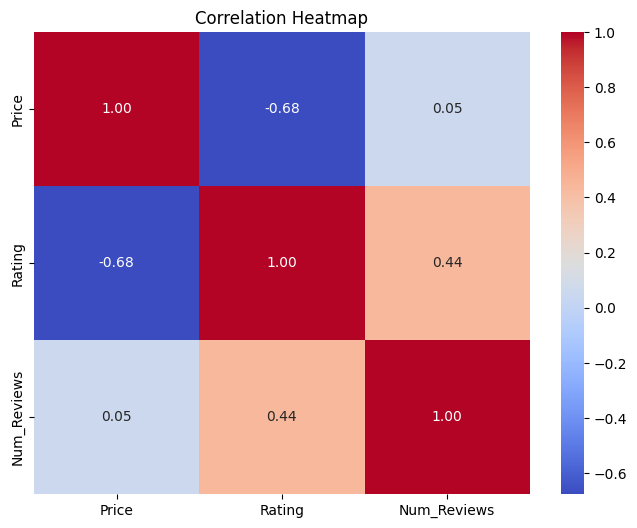

In [12]:
# Compute correlation matrix
correlation_matrix = df[['Price', 'Rating', 'Num_Reviews']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Analysis of the Heatmap
1. Price vs. Rating:
   - Correlation: -0.68
   - There is a moderate negative correlation between Price and Rating. This suggests that as prices increase, ratings tend to decrease. While this is not a strong negative correlation, it is noteworthy.
2. Price vs. Num_Reviews:

   - Correlation: 0.05
   - This is a very weak positive correlation, implying that price has almost no impact on the number of reviews. This indicates that customer engagement is not directly tied to product pricing.
3. Rating vs. Num_Reviews:

   - Correlation: 0.44
   - There is a moderate positive correlation between Rating and Num_Reviews. Higher-rated products tend to have more reviews, which is expected as better-rated products are more likely to attract customer feedback.
4. Diagonal Values:

   - These are all 1.0, as each variable is perfectly correlated with itself ( Price vs. Price).


In [13]:
# Split data by median price
median_price = df['Price'].median()
high_price_ratings = df[df['Price'] > median_price]['Rating']
low_price_ratings = df[df['Price'] <= median_price]['Rating']

# Perform t-test
t_stat, p_value = ttest_ind(high_price_ratings, low_price_ratings)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.400000000000006, P-value: 0.19907937465948555


In [14]:
# Define features and target
X = df[['Price', 'Num_Reviews']]
y = df['Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}, R² Score: {r2}")


Mean Squared Error: 0.00514205757858166, R² Score: -1.0568230314326423


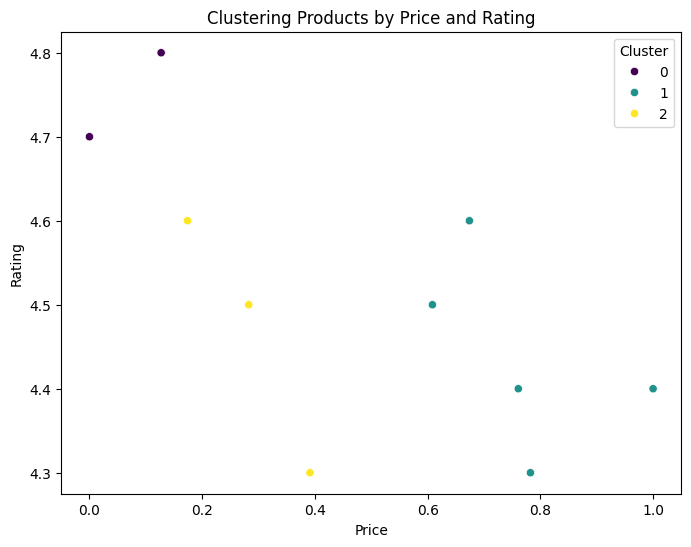

In [15]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Price', 'Rating']])

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Cluster', palette='viridis')
plt.title("Clustering Products by Price and Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

## Clustering Analysis
  - Cluster 0 (Purple): Low-priced products with the highest ratings (4.7–4.8). These are affordable and highly satisfying items.
  - Cluster 1 (Cyan): High-priced products with mid-range ratings (4.4–4.6). Represents premium items with varied satisfaction.
  - Cluster 2 (Yellow): Mid-priced products with lower ratings (4.3–4.5). Indicates potential issues or niche products.
### Key Insights
1. Price vs. Rating:
  - Low prices (Cluster 0) are associated with high ratings.
  - High-priced products (Cluster 1) show more variability in ratings.
2. Distinct Groups:
  - Products are neatly separated into affordable, mid-range, and premium categories.
3. Overview
  - Cluster 0: "best value for money."
  - Cluster 1: Include premium features to justify price.
  - Cluster 2: Focus on improving ratings through better features or support.